# Business Understanding

## Overview & Background

### Business Problem: 
SyriaTel is one of many telecommunication companies that runs within a very competitive market. It is  currently experiencing frequent customer churn, which leads to lost revenue, which in turn affects other business processes within the company. The needs a method to identify customers at risk of churning so they can implement retention strategies and minimize customer loss.


#### Proposed solution

To better understand the the factors that influence customer decisions to remain with the company or discontinue using the service,  a comprehensive analysis using classification models is required. This model will analyzze historical data maintained by the company about customer demographics and usage patterns to make informed decisions while taking action in order to increase customer retention


#### Problem statement

SyriaTel, a telecommunications company is experiencing customer churn which leads to loss of revenue. The company lacks a deep understanding of the factors that influence customer decisions to remain with the company or discontinue service use. The company requires to find an informed way to find out the customers at risk of churning so that some retention strategies can be developed or implemented to minimize customer loss and increase revenue. 

#### Objectives

1. To analyze the SyriaTel's customer data dataset to identify statistically significant features that impact customer churn.

1. To yeild visualizations that give insights that can inform actionable strategies

1. To build multiple classification models that predict the binary target variable ,churn, whose coefficients ar easily interpretable

1. To evaluate the model's performance using metrics such as Recall, Precision and F1score

# Data Understanding



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

In [6]:
df = pd.read_csv("Data/bigml_59c28831336c6604c800002a.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
df.shape

(3333, 21)

In [8]:
df. columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

##### Data columm descriptions

Account Length: how long account has been active. 

VMail Message: Number of voice mail messages send by the customer.

Day Mins: Time spent on day calls.

Eve Mins: Time spent on evening calls.

Night Mins: Time spent on night calls.

Intl Mins: Time spent on international calls.

Day Calls: Number of day calls by customers.

Eve Calls: Number of evening calls by customers.

Intl Calls: Number of international calls.

Night Calls: Number of night calls by customer.

Day Charge: Charges of Day Calls.

Night Charge: Charges of Night Calls.

Eve Charge: Charges of evening Calls.

Intl Charge: Charges of international calls.

VMail Plan: Voice mail plan taken by the customer or not.

State: State in Area of study.

Phone: Phone number of the customer.

Area Code: Area Code of customer.

Intl Plan: Does customer have international plan or not.

CustServ Calls: Number of customer service calls by customer.

Churn : Customers who churned the telecom service or who doesn’t(0 =“Churner”, 1 =“Non-Churner”)

In [9]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [10]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Data Cleaning


In [12]:
# Checking for missing values 
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [13]:
# Checking for dupliate values
df.duplicated().sum()

0

In [14]:
df['area code'].unique()

array([415, 408, 510], dtype=int64)

In [15]:
#Since "area code" is a categorical column, we convert it to string
df['area code'] = df['area code'].astype(str)
df.dtypes

state                      object
account length              int64
area code                  object
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

# EDA


### Univariate Analysis

Studying the distribution of a single continuous numerical value

Is there a significant difference in the average daily call duration between churning and non-churning customers?

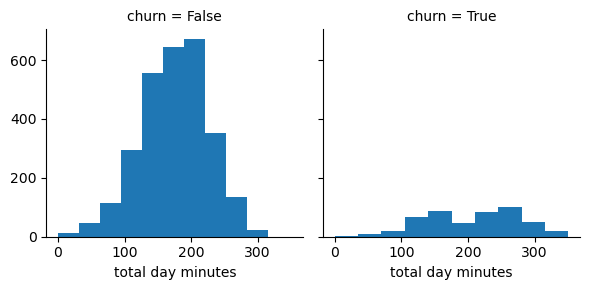

In [16]:
from project_funcitons import UnivariateAnalysis

analysis = UnivariateAnalysis(df)
analysis.plot_distribution("Total Day Minutes", "total day minutes")

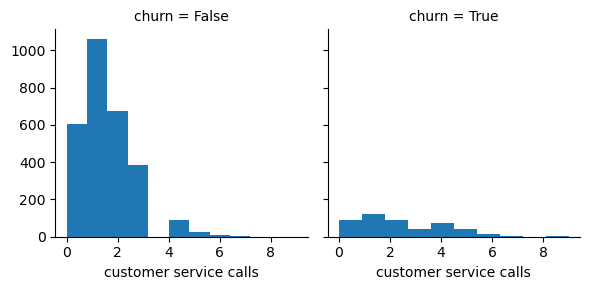

In [17]:
analysis.plot_distribution("Customer Service Calls", "customer service calls")


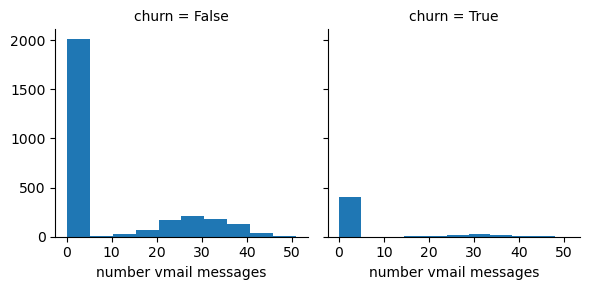

In [18]:
analysis.plot_distribution("Number of Voicemail Messages", "number vmail messages")

##### Reccomendation

vmail seems to be a service that many churners and non-churners do not use. 
The company could increase marketing efforts for this service to all it's users. 

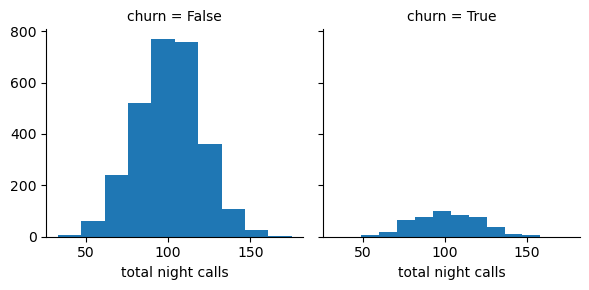

In [19]:
analysis.plot_distribution("total night calls", "total night calls")

<Axes: xlabel='churn', ylabel='customer service calls'>

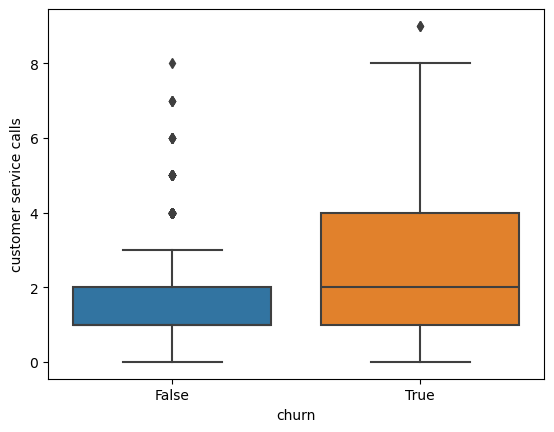

In [20]:
sns.boxplot(x = 'churn' , y = "customer service calls" , data=df)

Area codes where Churners and Non-churners are observed


In [21]:
crosstab1= pd.crosstab(df['area code'],df['churn'])
crosstab1

churn,False,True
area code,,
408,716,122
415,1419,236
510,715,125


Histogram and Heatmap to show churners per area code

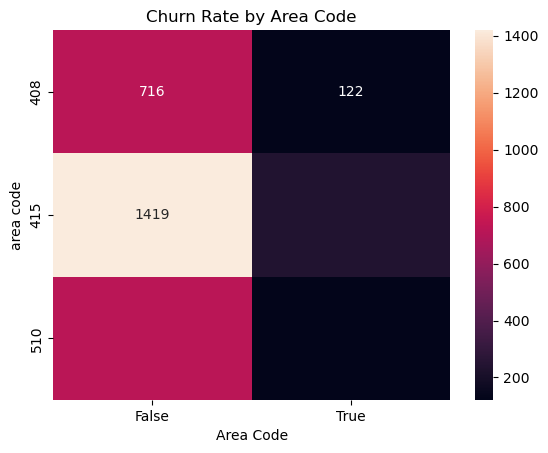

In [22]:
sns.heatmap(crosstab1, annot=True, fmt="d")  

plt.title("Churn Rate by Area Code")
plt.xlabel("Area Code")

plt.show()

##### Reccomendation
Targeted campaigns could be done in area codes with high number of churners

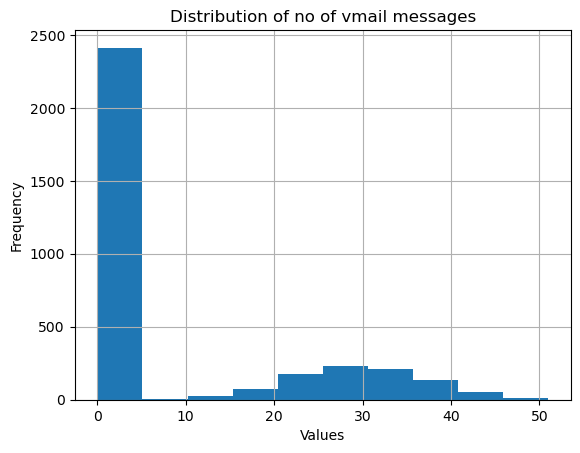

In [23]:
df['number vmail messages'].hist()  
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of no of vmail messages')
plt.show()

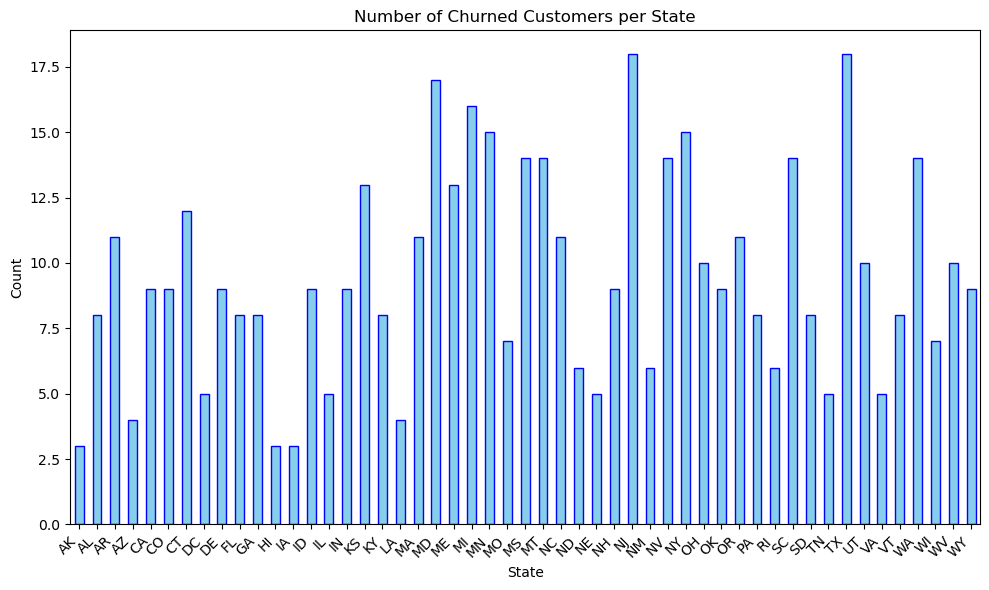

In [24]:
churn_perstate = df.groupby('state')['churn'].sum()  

plt.figure(figsize=(10, 6))
churn_perstate.plot(kind='bar', color='skyblue', edgecolor='blue')
plt.title("Number of Churned Customers per State")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [25]:
#plt.figure(figsize=(12,8))
#sns.scatterplot(x='account length', y='total charge')
df['number vmail messages'].skew()

1.2648236337102594

Correlation Analysis

In [26]:
df_numeric = df.select_dtypes(include=[np.number])

cor = df_numeric.corr()
cor


,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
account length,1.000000,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
number vmail messages,-0.004628,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
total day minutes,0.006216,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
total day calls,0.038470,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
total day charge,0.006214,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
total eve minutes,-0.006757,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
total eve calls,0.019260,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
total eve charge,-0.006745,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
total night minutes,-0.008955,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288
total night calls,-0.013176,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802


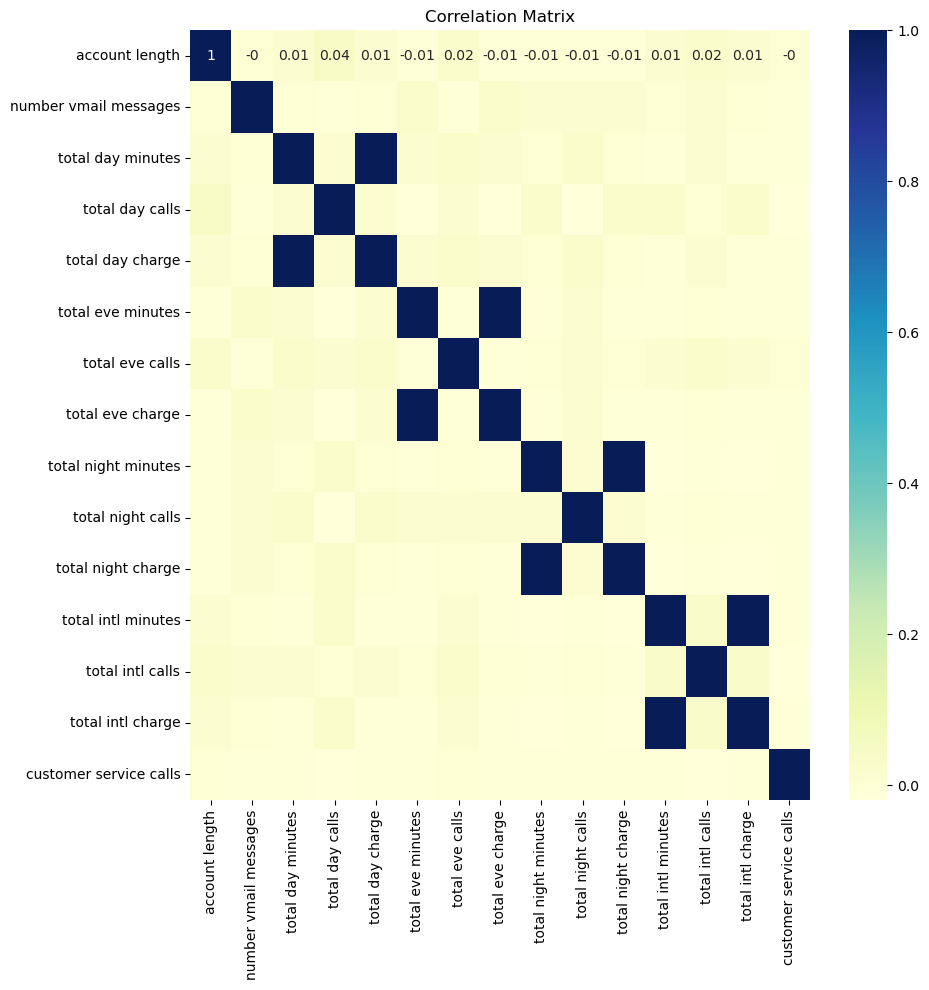

In [27]:
#Heatmap
plt.figure(figsize=(10, 10)) 
sns.heatmap(cor.round(2), annot=True, cmap='YlGnBu')  
plt.title("Correlation Matrix")
plt.show()

Total day charge & Total day minutes are highly correlated

Total eve charge and Total eve minutes are highly correlated

Total night charge & Total night minutes are highly correlated

Total intl charge & Total intl minutes are highly correlated

For each pair, one variable can be eliminated. 

In [28]:
columns_to_drop = ['total day charge' ,'total eve charge', 'total night charge', 'total intl charge', ]
df_numeric_dropped= df_numeric.drop(columns_to_drop, axis=1)  

df_numeric_dropped.columns


Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total eve minutes', 'total eve calls',
       'total night minutes', 'total night calls', 'total intl minutes',
       'total intl calls', 'customer service calls'],
      dtype='object')

For Numeric columns: 


H0 - There is no statistical significant correlation between the feature and the target variable.

Ha -  There is a significant correlation between the feature and the target variable

If pvalue>0.05 = accept the null hypothesis 

If pvalue <0.05 = reject the null hypothesis 

In [29]:
numeric_cols = df_numeric_dropped.columns.to_list()

numeric_cols

['account length',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total eve minutes',
 'total eve calls',
 'total night minutes',
 'total night calls',
 'total intl minutes',
 'total intl calls',
 'customer service calls']

In [30]:
y = df['churn']
selected_columns = None
from sklearn.feature_selection import f_classif
fval,pval = f_classif(df_numeric_dropped,y)
for i in range(len(numeric_cols)):
    print(numeric_cols[i],pval[i])


account length 0.33976000705720666
number vmail messages 2.1175218402696038e-07
total day minutes 5.300278227509361e-33
total day calls 0.28670102402211844
total eve minutes 8.011338561256927e-08
total eve calls 0.5941305829720491
total night minutes 0.04046648463758881
total night calls 0.7230277872081609
total intl minutes 8.05731126549437e-05
total intl calls 0.002274701409850077
customer service calls 3.900360240185746e-34


In [31]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Features to be used

In [32]:
X_features = df[['area code', 'international plan','number vmail messages','total day minutes','total eve minutes',
     'total night minutes','total intl minutes','customer service calls']]
y = df['churn']

In [33]:
X_features.head()

,area code,international plan,number vmail messages,total day minutes,total eve minutes,total night minutes,total intl minutes,customer service calls
0,415,no,25,265.1,197.4,244.7,10.0,1
1,415,no,26,161.6,195.5,254.4,13.7,1
2,415,no,0,243.4,121.2,162.6,12.2,0
3,408,yes,0,299.4,61.9,196.9,6.6,2
4,415,yes,0,166.7,148.3,186.9,10.1,3


In [34]:
X_features.dtypes

area code                  object
international plan         object
number vmail messages       int64
total day minutes         float64
total eve minutes         float64
total night minutes       float64
total intl minutes        float64
customer service calls      int64
dtype: object

In [35]:
X_features['international plan'].unique()

array(['no', 'yes'], dtype=object)

### Preprocessing 

In [36]:
# label encoding for area code column
from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()
X_features.loc[:, 'area_code_encoded'] = encoder.fit_transform(X_features['area code'])

X_features.tail()


C:\Users\user\AppData\Local\Temp\ipykernel_19020\184457964.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_features.loc[:, 'area_code_encoded'] = encoder.fit_transform(X_features['area code'])


,area code,international plan,number vmail messages,total day minutes,total eve minutes,total night minutes,total intl minutes,customer service calls,area_code_encoded
3328,415,no,36,156.2,215.5,279.1,9.9,2,1
3329,415,no,0,231.1,153.4,191.3,9.6,3,1
3330,510,no,0,180.8,288.8,191.9,14.1,2,2
3331,510,yes,0,213.8,159.6,139.2,5.0,2,2
3332,415,no,25,234.4,265.9,241.4,13.7,0,1


In [37]:
#Mapping international plan
internationalPlan_mapping = {"yes": 1, "no": 0}
X_features.loc[:, 'international plan'] = X_features['international plan'].replace(internationalPlan_mapping)

X_features.head()

,area code,international plan,number vmail messages,total day minutes,total eve minutes,total night minutes,total intl minutes,customer service calls,area_code_encoded
0,415,0,25,265.1,197.4,244.7,10.0,1,1
1,415,0,26,161.6,195.5,254.4,13.7,1,1
2,415,0,0,243.4,121.2,162.6,12.2,0,1
3,408,1,0,299.4,61.9,196.9,6.6,2,0
4,415,1,0,166.7,148.3,186.9,10.1,3,1


In [38]:
X_features= X_features.drop('area code', axis=1)

X_features.head()

,international plan,number vmail messages,total day minutes,total eve minutes,total night minutes,total intl minutes,customer service calls,area_code_encoded
0,0,25,265.1,197.4,244.7,10.0,1,1
1,0,26,161.6,195.5,254.4,13.7,1,1
2,0,0,243.4,121.2,162.6,12.2,0,1
3,1,0,299.4,61.9,196.9,6.6,2,0
4,1,0,166.7,148.3,186.9,10.1,3,1


### Scaling & Train_test_Split

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = X_features.copy()
y = df['churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.25, random_state=42)


In [40]:
np.bincount(y_test)

# 0 - "churner"  1 - "Non-Churner"

array([709, 125], dtype=int64)

In [41]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print('y: ', y.shape)
print("y_train:", y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (2499, 8)
X_test:  (834, 8)
y:  (3333,)
y_train: (2499,)
y_test:  (834,)


# Modelling

## Logistic regression
Baseline evaluation metric  - DummyClassifier that always predicts class 0 (Churner)

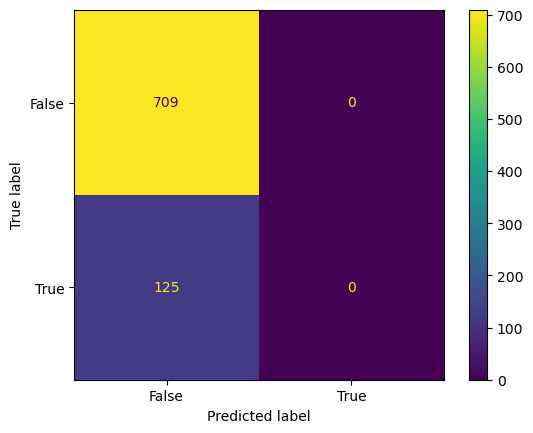

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier

ConfusionMatrixDisplay.from_estimator(estimator=DummyClassifier(strategy='constant', constant=0).fit(X_train, y_train),
                                       X=X_test, y=y_test);

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
dummy_model = DummyClassifier(strategy='constant', constant=0).fit(X_train, y_train)


In [44]:
dummy_accuracy = dummy_model.score(X_test, y_test)

print("Dummy Classifier Accuracy:", dummy_accuracy)


Dummy Classifier Accuracy: 0.8501199040767387


#### Fitted logistic regression model

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [46]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
cv_scores

array([0.754     , 0.758     , 0.758     , 0.768     , 0.77755511])

In [47]:
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.7877697841726619

The test set performance is similar to thhe cross-validation scores obtained earlier on the training set. This suggests this model generalizes reasonably well.


In [48]:
# Analysis on train data
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

y_pred2 = model.predict(X_train)
print("Accuracy : ", accuracy_score(y_train,y_pred2))
print("Recall : ", recall_score(y_train,y_pred2))
print("F1 score : ", f1_score(y_train,y_pred2))
print("Precision : ", precision_score(y_train,y_pred2))

Accuracy :  0.7643057222889156
Recall :  0.7346368715083799
F1 score :  0.4717488789237669
Precision :  0.3474240422721268


In [49]:
# performance analysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.95      0.79      0.86       709
        True       0.40      0.78      0.53       125

    accuracy                           0.79       834
   macro avg       0.67      0.79      0.69       834
weighted avg       0.87      0.79      0.81       834




Precision is low: Model identifies many customers as churn risks, but a large portion of them don't actually churn

### Logistic regression with different train_test_split (80/20)
##### Model 2


In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = X_features.copy()
y = df['churn']

scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)

Xtrain, Xtest, ytrain, ytest = train_test_split(Xscaled, y, test_size= 0.3, random_state=42, stratify=y)

model2 = LogisticRegression(class_weight='balanced')
model2.fit(Xtrain,ytrain)


LogisticRegression(class_weight='balanced')

In [51]:
y_pred3 = model2.predict(Xtest)
model2.score(Xtest, ytest)

0.762

In [52]:
print(classification_report(ytest, y_pred3))

              precision    recall  f1-score   support

       False       0.95      0.76      0.85       855
        True       0.35      0.77      0.48       145

    accuracy                           0.76      1000
   macro avg       0.65      0.77      0.67      1000
weighted avg       0.86      0.76      0.79      1000



##### Logistic regression evaluation
0.77 Recall - The model correctly identifies 77% of the actual churners. The model seems effective at capturing a significant portion of customers who are about to churn. 

0.35 Precision - The model generates a significant number of false positives. (65%).
These are customers flagged as churn risks who don't actually churn.

## Decision Tree Classifier
##### Model 3

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = X_features.copy()
y = df['churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.25, random_state=42)

dtmodel = DecisionTreeClassifier(random_state=10,class_weight={0:0.5,1:0.5})
dtmodel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, random_state=10)

In [54]:
dt_y_pred = dtmodel.predict(X_test)
dtmodel.score(X_test, y_test)

0.8896882494004796

In [55]:
#Analysis on testing data
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

       False       0.94      0.93      0.94       709
        True       0.63      0.64      0.63       125

    accuracy                           0.89       834
   macro avg       0.78      0.79      0.78       834
weighted avg       0.89      0.89      0.89       834



##### Decision tree evaluation
Model is overfitting on training data. 
To handle overfitting, decrease the value of max_depth, increase min_samples_leaf and min_samples_split

Recall - 0.64: The model correctly identifies 64% of the actual churners
Precision - 0.63 : Out of every 100 customers the model identifies as likely to churn, only 63 of them actually churn

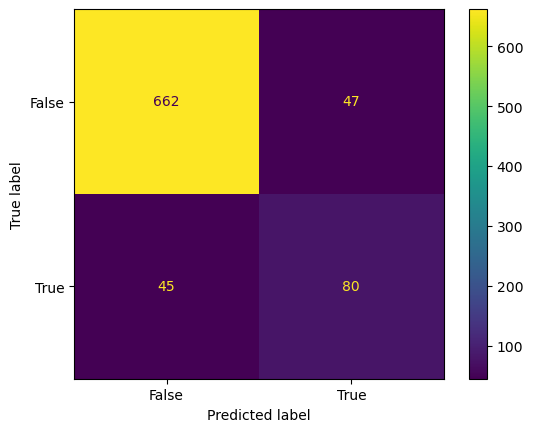

In [56]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

dt_cm = confusion_matrix(y_test, dt_y_pred)
dt_cm_display = ConfusionMatrixDisplay(dt_cm, display_labels=y.unique())
dt_cm_display.plot(values_format='d')
plt.show()

### Hyper-Parameter Tuning for Decision tree
##### Model 4

In [57]:
from sklearn.model_selection import GridSearchCV
dt_param_grid = {'max_depth':[2,3,4,5,6], 'min_samples_split': [10,15,20,30,40] }
grid_dtmodel=GridSearchCV(dtmodel, dt_param_grid)
grid_dtmodel.fit(X_train, y_train)

best_tree = grid_dtmodel.best_estimator_
best_tree



DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, max_depth=6,
                       min_samples_split=10, random_state=10)

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
y_pred_best = best_tree.predict(X_test)

dt_best_accuracy= accuracy_score(y_test, y_pred_best)

dt_best_recall = recall_score(y_test, y_pred_best)
dt_best_precision = precision_score(y_test, y_pred_best)
print("Accuracy is: ", dt_best_accuracy, " | precision_score is: ",dt_best_precision, " | recall_score is : ", dt_best_recall)

Accuracy is:  0.9292565947242206  | precision_score is:  0.875  | recall_score is :  0.616


## Random Forest
##### Model 5

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

from sklearn.model_selection import RandomizedSearchCV

param_grid = [{
    'n_estimators': [100,500,1000],
    'criterion' : ['entropy', 'gini'],  
    'min_samples_split' : [2, 4, 7],
    'min_samples_leaf': [2,4],
    'max_depth': [8,10, 11],
    'class_weight': [{0: 1, 1: 3}, {0: 1, 1: 5}]
}]

In [60]:

random_grid_search = RandomizedSearchCV(rf,
                                        param_grid,
                                        cv=5,
                                        scoring='accuracy',
                                        n_jobs= -1,
                                        random_state=26
                                        )



In [61]:
random_grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions=[{'class_weight': [{0: 1, 1: 3},
                                                          {0: 1, 1: 5}],
                                         'criterion': ['entropy', 'gini'],
                                         'max_depth': [8, 10, 11],
                                         'min_samples_leaf': [2, 4],
                                         'min_samples_split': [2, 4, 7],
                                         'n_estimators': [100, 500, 1000]}],
                   random_state=26, scoring='accuracy')

In [62]:
random_grid_search.best_score_


0.936376753507014

In [63]:
random_grid_search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 11,
 'criterion': 'gini',
 'class_weight': {0: 1, 1: 3}}

In [64]:
best_random_forest = random_grid_search.best_estimator_

y_pred = best_random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.94      0.98      0.96       709
        True       0.88      0.67      0.76       125

    accuracy                           0.94       834
   macro avg       0.91      0.83      0.86       834
weighted avg       0.93      0.94      0.93       834



In [65]:
from sklearn.metrics import roc_curve, auc

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)


AUC: 0.827537376586742


This AUC value:0.807537376586742 is high. This indicates better overall model performance in distinguishing positive and negative cases than a random classifier.

## KNN


In [66]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils.class_weight import compute_class_weight

In [67]:

knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [68]:
knn_y_pred= knn.predict(X_test)

In [69]:
knn.score(X_test, y_test)

0.8908872901678657

In [70]:
knn_cm = confusion_matrix(y_test, knn_y_pred)
knn_cm

array([[704,   5],
       [ 86,  39]], dtype=int64)

In [71]:
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

       False       0.89      0.99      0.94       709
        True       0.89      0.31      0.46       125

    accuracy                           0.89       834
   macro avg       0.89      0.65      0.70       834
weighted avg       0.89      0.89      0.87       834



In [72]:
import sklearn as sk; print(sk.__version__)

1.2.2


Using different distance metrics and using weights

In [73]:
from sklearn.neighbors import KNeighborsClassifier

euclidean_distance = KNeighborsClassifier(metric='euclidean')
manhattan_distance = KNeighborsClassifier(metric='manhattan')
minkowski_distance = KNeighborsClassifier(metric='minkowski', p=5)  # You can adjust the p value (power)


euclidean_distance.fit(X_train, y_train)
manhattan_distance.fit(X_train, y_train)
minkowski_distance.fit(X_train, y_train)


y_pred_euclidean = euclidean_distance.predict(X_test)
print("Euclidean Distance Classification Report:")
print(classification_report(y_test, y_pred_euclidean))


Euclidean Distance Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.98      0.94       709
        True       0.82      0.39      0.53       125

    accuracy                           0.90       834
   macro avg       0.86      0.69      0.74       834
weighted avg       0.89      0.90      0.88       834



In [74]:
y_pred_manhattan = manhattan_distance.predict(X_test)
print("Manhattan Distance Classification Report:")
print(classification_report(y_test, y_pred_manhattan))

Manhattan Distance Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.98      0.94       709
        True       0.80      0.35      0.49       125

    accuracy                           0.89       834
   macro avg       0.85      0.67      0.71       834
weighted avg       0.88      0.89      0.87       834



In [75]:
y_pred_minkowski = minkowski_distance.predict(X_test)
print("Minkowski Distance Classification Report:")
print(classification_report(y_test, y_pred_minkowski))

Minkowski Distance Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.98      0.94       709
        True       0.82      0.39      0.53       125

    accuracy                           0.90       834
   macro avg       0.86      0.69      0.74       834
weighted avg       0.89      0.90      0.88       834



In [76]:
df.dtypes

state                      object
account length              int64
area code                  object
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

All 3 KNN using different distance metrics give very low recall. Model cannt be used to make predictions.

# Summary
The following are the models that were evaluated:
Logistic regression, decision tree, tuned decision tree, kNN model and tuned random forest. 

The metrics used to evaluate these models areprecision, recall, F1 score, and AUC. For our particular business problem, the cost of a cutomer leaving is high. Therefore, priority will be given to recall over precision in the precision- recall trade-off.


MODEL1  - FITTED LOGISTIC REGRESSION (75-25  split )
The model's performance was evaluated using 5-fold cross-validation on the training data. The average accuracy score across the folds was 0.762 with a standard deviation of 0.008. The model achieved an accuracy of 0.788 on the held-out test set."  The precision however is low.  Precision - Precision :  0.347 and a moderately high recall  of 0.734

Model 2-  FITTED LOGISTIC REGRESSION (8-/20 split)
Very low precision  of 0.35 and moderate recall of 0.77. 

Although these first two models give high recall, the very low precision will lead to wasted resources by the company as these models flag customers as churn risks who don't actually churn.

Model 3 - Decision tree
Recall - 0.64: The model correctly identifies 64% of the actual churners
Precision - 0.63 : Out of every 100 customers the model identifies as likely to churn, only 63 of them actually churn
This model also has an accuracy of 89%
This model has better precision and accuracy than the logistic model

Model 4 - Tuned decision tree
Using GridSearchCV, the parameters tuned on this tree were "max_depth" and 'min_samples_split'.
the model had precision_score of 0.875  and recall of  0.616


Model5 -Tuned Random Forest
The parameters tunes for this model include 'n_estimators',    'min_samples_split', 'min_samples_leaf, 'max_depth' and 'class_weight' It was evaluated using 5-fold cross-validation on the training data.
It had a precision of 0.87 and recall of 0.66. and AUC of 0.820. This AUC indicates better overall model performance in distinguishing positive and negative cases than a random classifier.


Model 6 - KNN
This model had the lowest recall of all models. Recall of o.31 and precision of 0.89. Since it is crucial to our business that churned customers are identified, this model will NOT be used. 


After evaluating all models, the best the tuned random forest achieved the highest F1 score. Though other models have higher recall, it is at the expense of missclassifying non-churners as churners. This model also has a high AUC of 0.820. This is therefore the best model. 


